# ANALISIS SENTIMEN E-COMMERCE METODE SVM DAN NAIVE BAYES

In [ ]:
# Import Library
import pandas as pd

In [ ]:
# Import Data
data = pd.read_excel('stemming_ecommerce.xlsx')
data

,Unnamed: 0,Stemming,label
0,0,cap adidas aeroready visor gue gr osfw hats,Positif
1,1,iphone gb por apenas,Positif
2,2,baca gmap ecommerce ticketing app baca reviewn...,Negatif
3,3,hai sahabat mohon maaf kait perihal sila konfi...,Negatif
4,4,coba ukur kaki deh beli ecommerce cocokin pato...,Positif
...,...,...,...
1081,1208,hyperx kingston headphone hyperx cloud flight ...,Positif
1082,1209,btw ada urus pajak kendara via ecommerce ijo,Positif
1083,1210,seller titik target kurir beda nama toko ecomm...,Positif
1084,1211,nih proses konfirmasi bayar manual bikin buyer...,Positif


In [ ]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns
# Menampilkan Jumlah Label Sentimen
temp = data.groupby('label').count()['Stemming'].reset_index().sort_values(by='Stemming',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,Stemming
1,Positif,881
0,Negatif,205


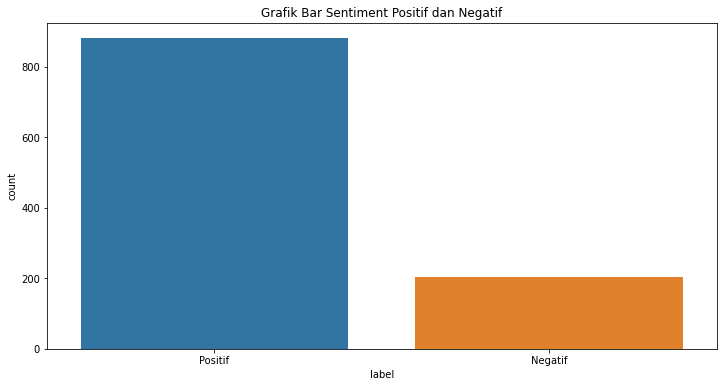

In [ ]:
# Menampilkan Jumlah Label Sentimen dalam bentuk Grafik BAR
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=data);
plt.title("Grafik Bar Sentiment Positif dan Negatif")
plt.savefig("grafik_bar.jpg");

In [ ]:
# Menampilkan Jumlah Label Sentimen Dalam Bentuk Grafik Pie
import plotly.express as px
fig = px.pie(data, names='label')
fig.update_layout(title_text='Grafik Persentase Sentimen', title_x=0.5, width=800, height=800)
fig.show()

#### Kategorisasi Data
Sebelum perhitungan TF-IDF, terlebih dahulu kita kategorikan data.
 - Kolom Label = Kategori
 - Kolom Review = String

In [ ]:
# Kategorisasi Data
data = data.astype({'label' : 'category'})
data = data.astype({'Stemming' : 'string'})
data.dtypes

Unnamed: 0       int64
Stemming        string
label         category
dtype: object

#### Perhitungan TF-IDF
Algoritma TF-IDF (Term Frequency – Inverse Document Frequency) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Contoh yang dibahas kali ini adalah mengenai penentuan urutan peringkat data berdasarkan query yang digunakan.
Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya adalah melakukan perkalian antara nilai TF dan IDF untuk mendapatkan jawaban akhir.

In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Perhitungan  Bag Of Word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Stemming'].astype('U'))
#Perhitungan TF-IDF
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Stemming'].astype('U'))
print(text_tf)

  (0, 1475)	0.35287307607682333
  (0, 2819)	0.3736313465139348
  (0, 1386)	0.3736313465139348
  (0, 1406)	0.19462346619353027
  (0, 4161)	0.3736313465139348
  (0, 47)	0.3736313465139348
  (0, 35)	0.3736313465139348
  (0, 603)	0.3736313465139348
  (1, 175)	0.538318849261833
  (1, 3059)	0.538318849261833
  (1, 1308)	0.44591227560922647
  (1, 1675)	0.4707312136663904
  (2, 443)	0.3755414131990033
  (2, 1758)	0.3398735025150607
  (2, 3304)	0.3398735025150607
  (2, 180)	0.292723089296024
  (2, 3935)	0.3398735025150607
  (2, 1042)	0.06262186755593081
  (2, 1362)	0.3755414131990033
  (2, 250)	0.5308361286745894
  (3, 1967)	0.33207775218722513
  (3, 4277)	0.1291305471245636
  (3, 377)	0.1344242486490036
  (3, 2042)	0.300537902815508
  (3, 3583)	0.26899805344379085
  :	:
  (1084, 2353)	0.2208186266056063
  (1084, 4063)	0.18840763774565866
  (1084, 2677)	0.16530315472271556
  (1084, 3375)	0.15284995059292247
  (1084, 3131)	0.2159410554403156
  (1084, 336)	0.1580770701110509
  (1084, 1845)	0.1086

In [ ]:
# Melihat Hasil Letak Sebuah Kata
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aa',
 'aaakk',
 'aadaab',
 'aaj',
 'aap',
 'aapke',
 'aapki',
 'aayinndekho',
 'ab',
 'abal',
 'abang',
 'abdi',
 'abis',
 'absen',
 'abu',
 'abuja',
 'ac',
 'acc',
 'account',
 'accounting',
 'acil',
 'acnedot',
 'aco',
 'acrylic',
 'activatenya',
 'actually',
 'ada',
 'adab',
 'adakan',
 'adayang',
 'addicted',
 'adding',
 'address',
 'adekku',
 'adhik',
 'adidas',
 'adik',
 'admin',
 'admincs',
 'administrasi',
 'adminnya',
 'admn',
 'ado',
 'ads',
 'adu',
 'advisor',
 'advocate',
 'aeroready',
 'aerostreet',
 'aesthetic',
 'affected',
 'affiliater',
 'agens',
 'agent',
 'agents',
 'agt',
 'ah',
 'ahad',
 'ahensi',
 'ahli',
 'ai',
 'ain',
 'aing',
 'air',
 'aja',
 'ajang',
 'ajar',
 'ajig',
 'aju',
 'aka',
 'akak',
 'akal',
 'akhlaaq',
 'akomodasi',
 'akses',
 'aksi',
 'aktif',
 'aktivitas',
 'aku',
 'akuisisi',
 'akulaku',
 'akun',
 'akunting',
 'akurat',
 'al',
 'ala',
 'alam',
 'alamat',
 'alami',
 'alangkah',
 'alas',
 'alasn',
 'alat',
 'album',
 'alcoholic',
 'alesan',
 'alf

In [ ]:
# Melihat hasil kalkulasi dari TF-IDF dalam sebuah kata
text_tf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Ubah Data TF-IDF ke dalam bentuk DataFrame
df = pd.DataFrame(text_tf.todense().T,
                  index=vectorizer.get_feature_names(),
                  columns=[f'D{i+1}' for i in range(len(data))])
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1077,D1078,D1079,D1080,D1081,D1082,D1083,D1084,D1085,D1086
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
aaakk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
aadaab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
aaj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
aap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zegna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.339901
zesters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
zinc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
zona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


#### Split Validation
Split Validation adalah teknik validasi
yang membagi data menjadi dua bagian secara acak,
sebagian sebagai data training dan sebagian lainnya
sebagai data testing. Dengan menggunakan Split
Validation akan dilakukan percobaan training
berdasarkan split ratio yang telah ditentukan
sebelumnya, untuk kemudian sisa dari split ratio
data training akan dianggap sebagai data testing.
Data training adalah data yang akan dipakai dalam
melakukan pembelajaran sedangkan data testing
adalah data yang belum pernah dipakai sebagai
pembelajaran dan akan berfungsi sebagai data
pengujian kebenaran atau keakurasian hasil
pembelajaran. Namun disini kami split data training 0.9 (90%) dan data testing 0.1(10%)

In [ ]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['label'], test_size=0.2, random_state=33)
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (868, 4314)
X_test_shape :  (218, 4314)
y_train_shape :  (868,)
y_test_shape :  (218,)


#### Parameter Turning Metode SVM
Hyperparameter  Tuning adalah  proses  pemilihan parameter terbaik  untuk  algoritma pembelajaran.   Salah   satu   untuk   menentukan   kombinasi Hyperparameter adalah   dengan menggunakan GridSearch. grid search adalah suatu cara untuk menemukan parameter terbaik yang digunakan untuk modeling dalam machin learning. Apabila kita memakai grid search ini kita bisa mencari mana hyperparameter terbaik yang hendak kita gunakan untuk modeling di suatu algoritma machine learning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Membuat sebuah parameters dengan masing-masing jenis kernel, nilai C dan nilai Gamma
parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

Dari hasil parameter turning dengan GridSearch. bahwa Kernel terbaik adalah "poly", C terbaik adalah 10, dan nilai gamma terbaik adalah scale. sehingga menghasilkan score 0.80 (80%)

In [ ]:
# Menampilkan jenis Kernel, Nilai C dan Nilai Gamma terbaik (Best_Score)
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
  print(f'\t{param}: {best_params[param]}')

Best Score: 0.8087436050760747
Best Parameters:
	kernel: poly
	C: 10
	gamma: scale


#### Evaluasi Model SVM

In [ ]:
from sklearn.metrics import classification_report
# Evaluasi hasil
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        35
     Positif       0.84      0.99      0.91       183

    accuracy                           0.83       218
   macro avg       0.42      0.50      0.46       218
weighted avg       0.70      0.83      0.76       218



In [ ]:
# Hasil prediksi
print (y_pred)

['Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Posi

#### Confusion Matriks
Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui

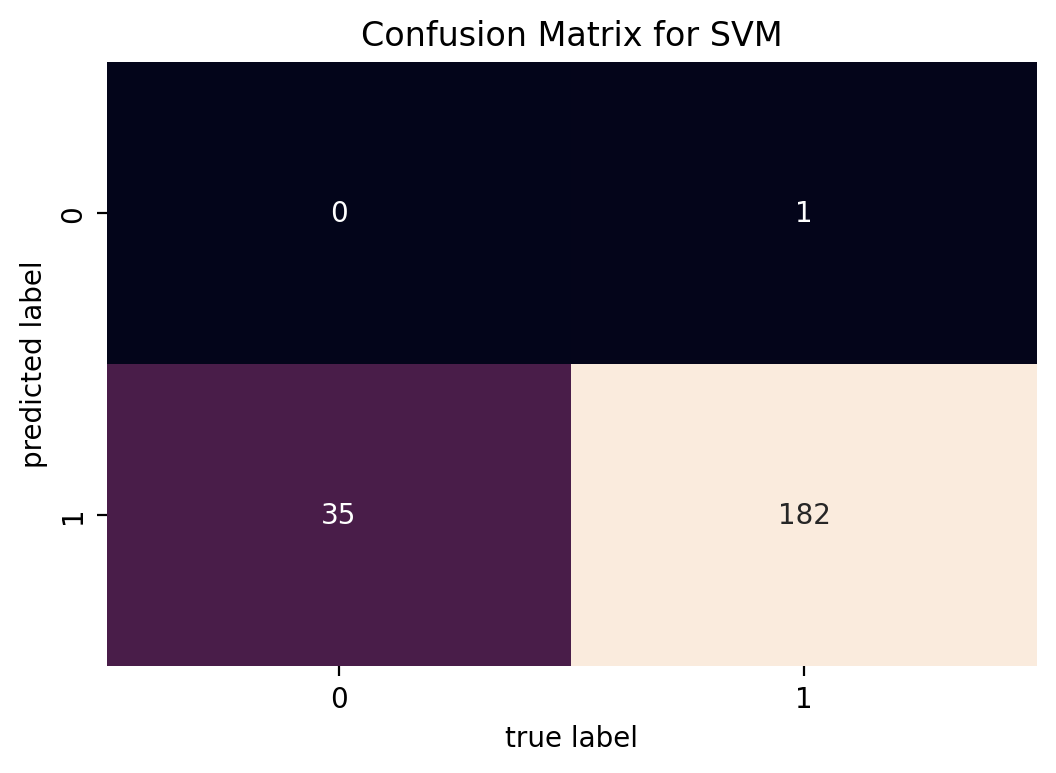

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=200)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for SVM')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("Confusion Matriks_SVM-test20%.jpg")
plt.show()

### Metode Complement Naive Bayes

Algoritma Complement Naive Bayes merupakan modifikasi dari algoritma standar Multinomial Naive Bayes. Multinomial Naive Bayes tidak dapat bekerja dengan baik dengan data yang tidak stabil. Kumpulan data tidak seimbang adalah contoh di mana jumlah contoh milik kelas tertentu lebih besar dari jumlah contoh milik kelas yang berbeda. Ini menyiratkan penyebaran contoh tidak merata. Jenis data ini bisa sulit untuk dianalisis karena model dapat dengan mudah menyesuaikan data ini untuk memberi manfaat bagi kelas dengan instance yang lebih besar.
Complement Naive Bayes sangat cocok untuk menangani data yang tidak seimbang. Dalam Complement Naive Bayes, alih-alih menghitung probabilitas item milik kelas tertentu, kami menghitung probabilitas item menjadi bagian dari semua kelas.

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier model Multinomial
from sklearn.naive_bayes import ComplementNB # Naive Bayes Classifer Model Complement
model_naive = ComplementNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

In [ ]:
print(predicted_naive)

['Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif'
 'Positif' 'Negatif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Positif'
 'Negatif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Negatif' 'Positif'
 'Positif' 'Positif' 'Negatif' 'Negatif' 'Positif' 'Negatif' 'Positif'
 'Negatif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Positif' 'Negatif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif' 'Positif'
 'Negatif' 'Negatif' 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif'
 'Positif' 'Negatif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Negatif'
 'Positif' 'Positif' 'Negatif' 'Positif' 'Positif' 'Negatif' 'Negatif'
 'Negatif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif' 'Positif'
 'Positif' 'Positif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Negatif'
 'Negatif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Positif' 'Positif'
 'Posi

### Confusion Matriks Complement Naive Bayes

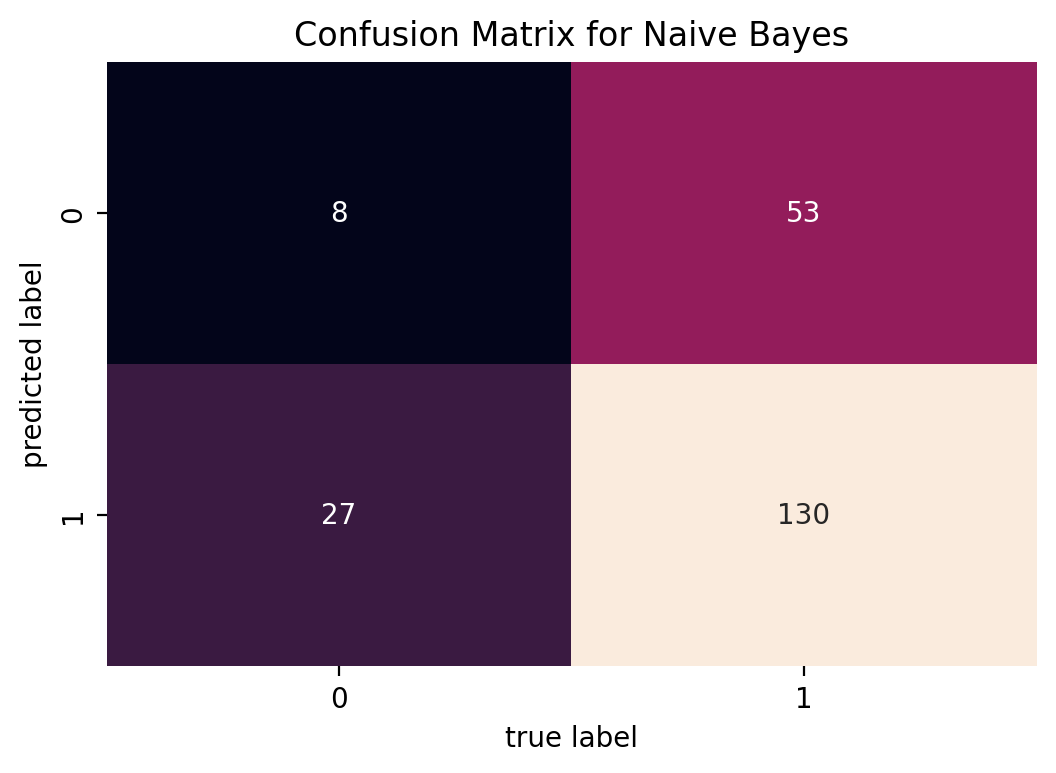

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=200)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("Confusion Matriks_Naive_Bayes-test20%.jpg")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

     Negatif       0.13      0.23      0.17        35
     Positif       0.83      0.71      0.76       183

    accuracy                           0.63       218
   macro avg       0.48      0.47      0.47       218
weighted avg       0.72      0.63      0.67       218



### Prediksi Model

In [ ]:
# Input kalimat teks
kalimat_tes = ["biasa aja" ]
#Loop untuk prediksi
for teks in kalimat_tes:
    arr_teks = []
    arr_teks.append(teks)
    vektor = vectorizer.transform(arr_teks)
    prediksi_label_NB= model_naive.predict(vektor)

In [ ]:
# Print hasil prediksi
prediksi_label_NB

array(['Negatif'], dtype='<U7')

#### WordCloud
wordcloud adalah gambar yang menunjukkan daftar kata-kata yang digunakan dalam sebuah teks, umumnya semakin banyak kata yang digunakan semakin besar ukuran kata tersebut dalam gambar.

### 1. WordCloud Sentimen Negatif

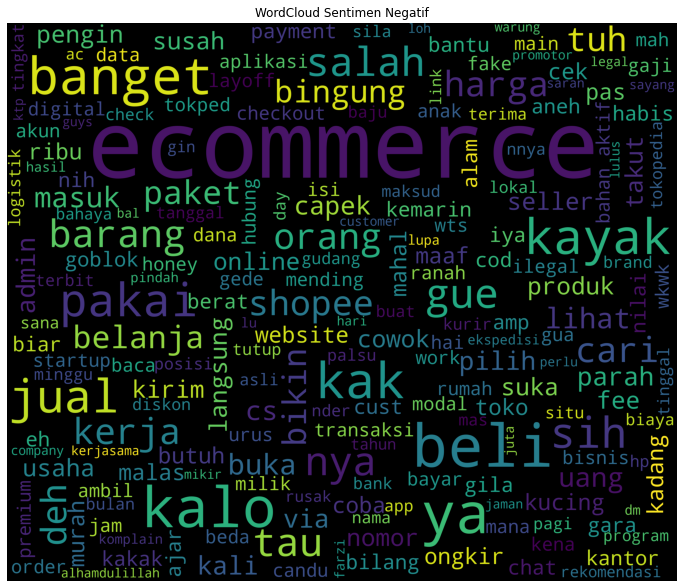

In [ ]:
# Import Library WordCloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df=data[data['label']=='Negatif']
words = ' '.join(new_df['Stemming'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Negatif")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2. WordCloud Sentimen Positif

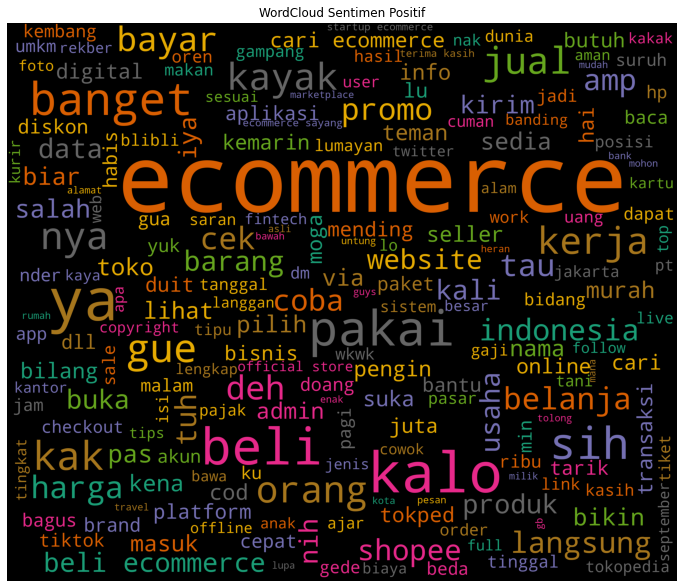

In [ ]:
# Import Library WordCloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df=data[data['label']=='Positif']
words = ' '.join(new_df['Stemming'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',colormap = 'Dark2',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Positif")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 3. WordCloud Semua Kata Baik Sentimen Positif maupun Sentimen Negatif|

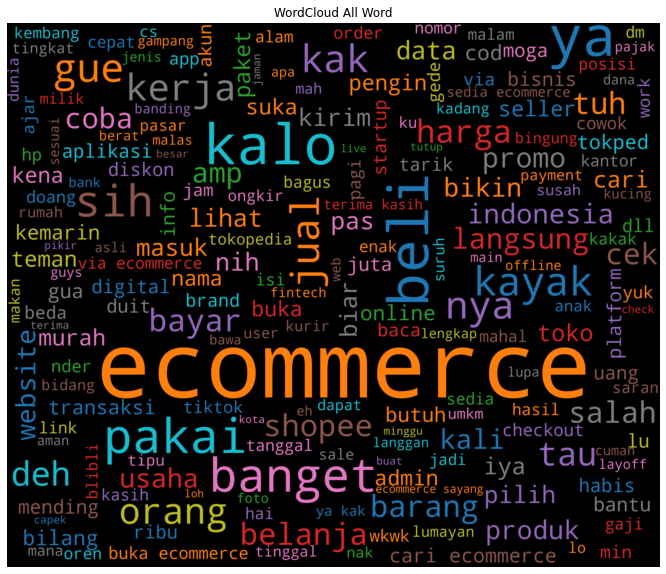

In [ ]:
allWords  = ' '.join( [str (twts) for twts in data['Stemming']])
wordCloud = WordCloud(width = 3000, height=2500, colormap = 'tab10', random_state=21).generate(allWords)
plt.figure(figsize=(12,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.title("WordCloud All Word")
plt.axis('off')
plt.show()